In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
cd /content/drive/MyDrive/Flask_knee

/content/drive/MyDrive/Flask_knee


# Dataset Link:
https://data.mendeley.com/datasets/t9ndx37v5h/1

In [ ]:
%tensorflow_version 1.x

ValueError: Tensorflow 1 is unsupported in Colab.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

In [72]:
import tensorflow
print(tensorflow.__version__)

2.18.0


#Data Preprocessing

In [73]:
import cv2,os
data_path='/content/drive/MyDrive/Flask_knee/Knee-Dataset/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'Normal': 0, 'Doubtful': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4}
['Normal', 'Doubtful', 'Mild', 'Moderate', 'Severe']
[0, 1, 2, 3, 4]


In [74]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

# Recale and assign  catagorical labels

In [75]:
pip install --upgrade keras tensorflow


In [76]:
import keras
print(keras.__version__)


3.8.0


In [77]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)

from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
new_label = to_categorical(label)


In [79]:
new_label.shape

(1650, 5)

#CNN Model

In [80]:
data.shape

(1650, 256, 256, 1)

In [81]:
data.shape[1:]

(256, 256, 1)

In [82]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 254, 254, 128)       │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 254, 254, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 127, 127, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 125, 125, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 125, 125, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 60, 60, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 60, 60, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,788,645 (14.45 MB)

 Trainable params: 3,788,645 (14.45 MB)

 Non-trainable params: 0 (0.00 B)

# Splitting data into traning and testing

In [84]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

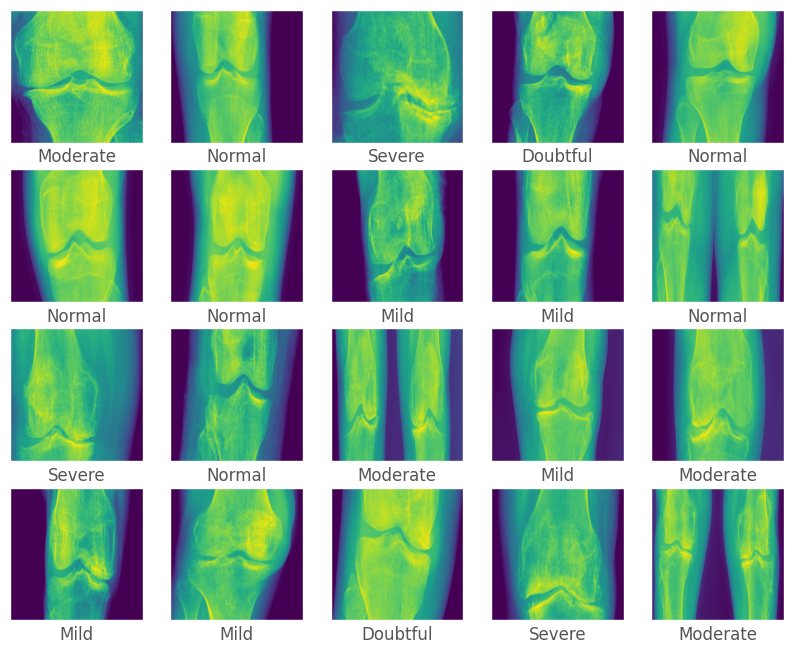

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [86]:
history=model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.2645 - loss: 1.5568 - val_accuracy: 0.3502 - val_loss: 1.5004
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.3331 - loss: 1.5227 - val_accuracy: 0.2963 - val_loss: 1.4901
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.3192 - loss: 1.5114 - val_accuracy: 0.3468 - val_loss: 1.4807
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.3547 - loss: 1.4920 - val_accuracy: 0.3266 - val_loss: 1.4642
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - accuracy: 0.3787 - loss: 1.4440 - val_accuracy: 0.3401 - val_loss: 1.4347
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.3592 - loss: 1.4355 - val_accuracy: 0.3603 - val_loss: 1.3931
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.3973 - loss: 1.4047 - val_accuracy: 0.4007 - val_loss: 1.3657
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.4234 - loss: 1.3427 - val_acc

In [87]:
model.save('model.h5')

In [88]:
from matplotlib import pyplot as plt

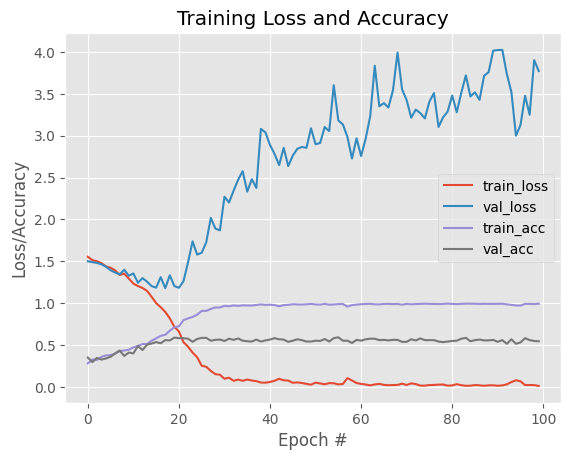

In [90]:
# plot the training loss and accuracy
N = 100 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [91]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 3.706281900405884 %
test accuracy: 0.539393961429596 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
A.I predicts: Moderate
Correct prediction for label 4 is Severe


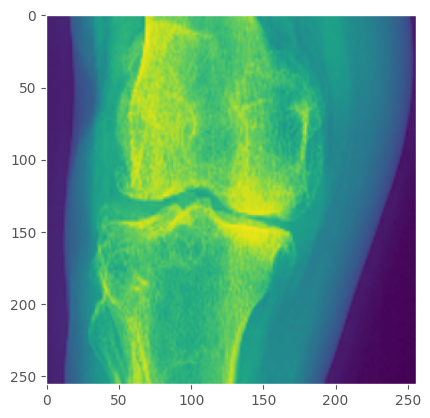

In [92]:
X = 32

img_size = 256

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],256,256,1)

predictions_single = model.predict(img_single)
print('A.I predicts:',categories[np.argmax(predictions_single)])
print("Correct prediction for label",np.argmax(y_test[X]),'is',categories[np.argmax(y_test[X])])
plt.imshow(np.squeeze(img_single))
plt.grid(False)
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


<Figure size 640x480 with 0 Axes>

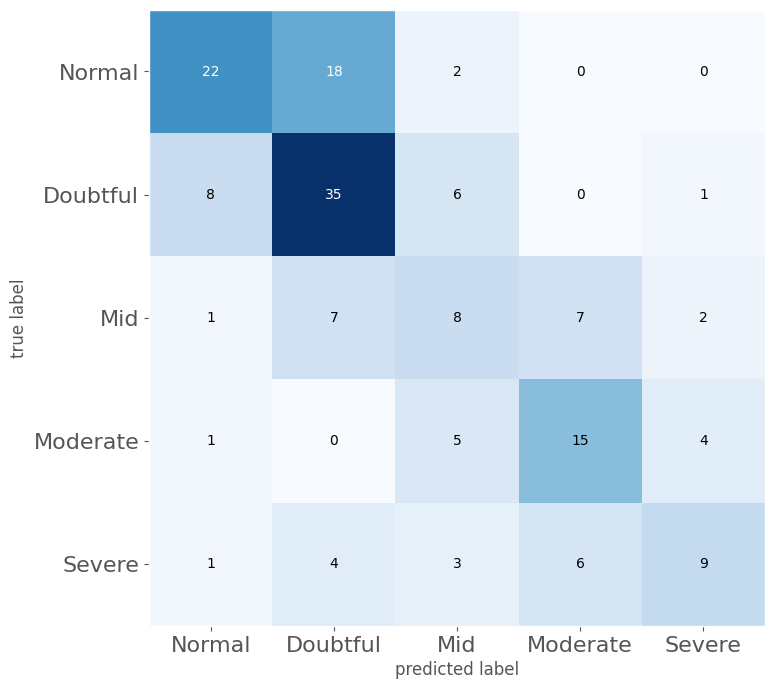

In [93]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()